<a href="https://colab.research.google.com/github/thicpanda/public-health-sample/blob/main/Times_Series_analysis_of_SNAP_data_and_Macro_factors_in_the_US.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook will showcase an analysis of SNAP data provided by the USDA while also adding other data sources (primarily macro economic data). I will also showcase some ML techniques applied to this dataset as big data predictive analytics is not widely adopted in public health. This analysis will be relevant as it gives a foothold of what is currently goingon within the SANP program and how it has been adminstrated in the past. SNAP is an important piece of the food syste mwe have the US as it is a means for thoes with food insecurity due to financial difficulties access to food. If the program doesn't operate as intended those with food insecurites are vulnerable to dietary deficient medical conditions that are easily preventable. 

The dataset used is available on my Github at https://github.com/thicpanda/public-health-sample and will be linked in the data sources at teh bottom of this python notebook. 

This code was written on Google Colab

Relevant Terms used - I will be using terms from several diffferent fields that are esoteric and will try to keep track of the more technical or not common terms here.



Context

Packages used are the standard data science packages, I also added on a package called data augmentation (details at the bottom of the notebook). Data augmentation will be used later on to assist with the ML techniques used as having annual data starting in 1969 will not result in enough data to result in a robust predictive model considering trained models usually use exponentially larger datasets to train the models. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy as sci
import statsmodels.api as stat
import statsmodels.formula.api as smf
import io
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
url = 'https://raw.githubusercontent.com/thicpanda/public-health-sample/main/SNAP%20Data?token=AVOW3SLTZVPZ3N6QTKY7ALLBWDZMU'
#I ported the dataset that I already cleaned and feature engineered, to retrive data you will need to go to the Github link on top of the Python Notebook and click the "Raw" view of the files the copy and past the url as the token wil likely have refreshed
df1 = pd.read_csv(url)

In [4]:
df1

,Fiscal_Year,Average_Participation(thousands),Average_Monthly_Benefit_Per_Person($),Total_Benefits(Millions),All_Other_Costs(Millions),Total_Costs(Millions),Annual_Inflation(%),Annual_US_Population_Growth(%),Annual_Participation_Growth_Rate(%),Annual_Admin_Cost_Growth(or_loss),Annual_Total_Benefit_Growth(%),Monthly_Benefit_Growth_Per_Person(%),Total_Benefits_Minus_Inflation(%)
0,1969,"2,878",6.63,228.80,21.70,250.50,5.46,0.90,0.00,0.00,0.00,0.00,0.00
1,1970,"4,340",10.55,549.70,27.20,576.90,5.84,0.89,33.69,20.22,58.38,37.16,52.54
2,1971,"9,368",13.55,"1,522.70",53.20,"1,575.90",4.29,0.89,53.67,48.87,63.90,22.14,59.61
3,1972,"11,109",13.48,"1,797.30",69.40,"1,866.70",3.27,0.89,15.67,23.34,15.28,-0.52,12.01
4,1973,"12,166",14.60,"2,131.40",76.00,"2,207.40",6.18,0.90,8.69,8.68,15.68,7.67,9.50
5,1974,"12,862",17.61,"2,718.30",119.20,"2,837.50",11.05,0.90,5.41,36.24,21.59,17.09,10.54
6,1975,"17,064",21.40,"4,385.50",233.20,"4,618.70",9.14,0.91,24.62,48.89,38.02,17.71,28.87
7,1976,"18,549",23.93,"5,326.50",359.00,"5,685.50",5.74,0.92,8.01,35.04,17.67,10.57,11.92
8,1977,"17,077",24.71,"5,067.00",394.00,"5,461.00",6.50,0.93,-8.62,8.88,-5.12,3.16,-11.62
9,1978,"16,001",26.77,"5,139.20",380.50,"5,519.70",7.63,0.94,-6.72,-3.55,1.40,7.70,-6.23


Feature Engineering - So the raw data I have compiled consists of some basic macro data in the US inflation and population growth rate as well as the data provided by the USDA who administers the SNAP program. I use various techniques to transform the data into more helpful forms to provide analysis of the SNAP program over time given some basic macro data to compare it with. 

Original Raw data consisted of:

Year

Average Participation (Thousands)

Average Monthly Benefits Per Person (Dollars)

Total Benefits (Millions)

All Other Costs (Millions)

Total Costs (Millions)

Annual Inflation (%)

Annual US Population Growth (%)

Some Features I added in that were useful are:

Annualized Growth (or recession): US Population, SNAP Program Particiaption, Admin Cost Growth, and Monthly Benefit Annual Growth

Another Feature engineered for this anlysis is the difference in rates between annual growth of total benefits of the program and inflation.



This next session will visualize specific features in the dataset and my analysis of the SNAP program over the lifespan of the SNAP program. In order they'll go as

1. Participation Rates and Population Growth

2. Benefits, Benefits per Person, and Inflation

3. Admin Costs relative to Size of Total Benefts--> event driven based on legislation 

4. Extreme Examples and Patterns 

5. Moving Average/Rolling Window Summary



#1. Participation Rates and Population Growth

Text(0, 0.5, 'SNAP Participation and US Population Growth')

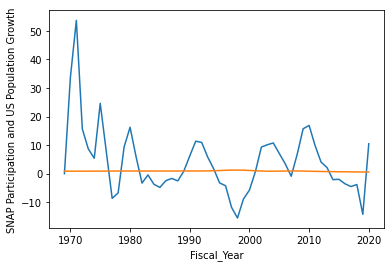

In [5]:
sns.lineplot(x ="Fiscal_Year", y="Annual_Participation_Growth_Rate(%)", data = df1)
sns.lineplot(x ="Fiscal_Year", y="Annual_US_Population_Growth(%)", data = df1)
plt.ylabel("SNAP Participation and US Population Growth")

#Text Mentioning any relationship between population growth in the US and SNAP participation is weak

# 2. Benefits, Benefits per Person, and Inflation

Text(0, 0.5, 'Benefit Growth/Decay per Person vs US Annual Inflation')

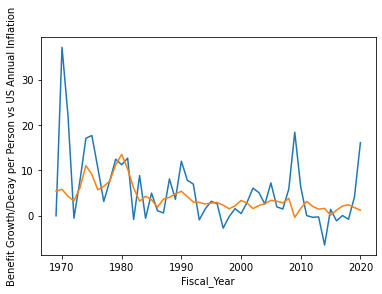

In [6]:
sns.lineplot(x ="Fiscal_Year", y="Monthly_Benefit_Growth_Per_Person(%)", data = df1)
sns.lineplot(x ="Fiscal_Year", y="Annual_Inflation(%)", data = df1)
plt.ylabel("Benefit Growth/Decay per Person vs US Annual Inflation")

#Further Analysis of Difference in growth of annual monthly benefit percentage change and annual inflation

Some data wrangling to display the difference between benefits per person percent change year over year and inflation. Negative values on the plot mean inflation outpaces the SNAP benefits growth that year and positive values mean the opposite

Text(0, 0.5, 'Benefit Percent Change Minus Annual Inflation')

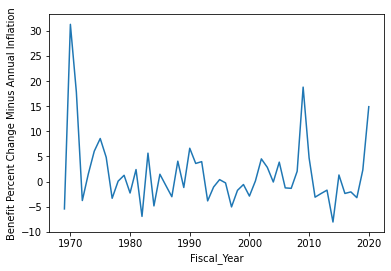

In [7]:
df1['Benefit_Percent_Change_and_Inflation_Difference'] = df1['Monthly_Benefit_Growth_Per_Person(%)'] - df1['Annual_Inflation(%)']

sns.lineplot(x ="Fiscal_Year", y="Benefit_Percent_Change_and_Inflation_Difference", data = df1)
plt.ylabel("Benefit Percent Change Minus Annual Inflation")

# 3. Admin Costs relative to benefits

Text(0, 0.5, 'Costs Growth')

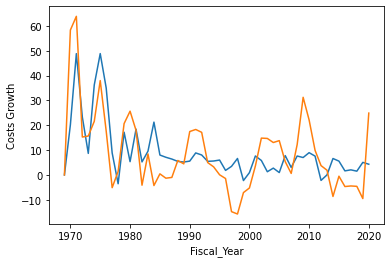

In [8]:
sns.lineplot(x ="Fiscal_Year", y="Annual_Admin_Cost_Growth(or_loss)", data = df1)
sns.lineplot(x ="Fiscal_Year", y="Annual_Total_Benefit_Growth(%)", data = df1)
plt.ylabel("Costs Growth")

When Sorting out he extream values of the dataset being used. There are many extreme instances in which I'd like to go over. 
1. The genesis of Food Stamps program, as expected the program was likely little known but quickly picked up attention
2. 2008 financial crisis
3. The Dot Com bubble

Suggestion: Due to the 




According to the USDA, the total expenses of the SNAP program is largely driven by participation in which the basic formula can be found on the website. 

The most recent legislation past regarding the SNAP program was passed in 2018 known as the "Farm Bill" or PL 115-334.

With inflation reaching record highs this year and the stimulus money from quantitative easing done for the 2020 pandemic market crash. It is safe to assume that the costs of food will undoubtedly continue to rise. Combine these facts with how the 

#Legislation Analysis
In the past couple of decades, reactive and not proactive. --> Have a neutral stance by 

#Forcasting Future Benefits per Person using a modified linear regression#
The "modified" part of linear regression is the use of data augmentation to increase the amount of data points wihch in theory should make the regression model more robust. 

Much of the code below is modified from the tensorflow time series forecasting example for the purpose of forecasting SNAP benefits per person. 

In [ ]:
#Augment Data so we have more than 100 instances to work with resulting in a better model


In [ ]:
#Importing relevant packages to build ML model and splitting the data into testing, validation, and testing for traiing said models
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import tensorflow as tf

column_indices = {name: i for i, name in enumerate(df1.columns)}

n = len(df1)
train_df = df1[0:int(n*0.7)]
val_df = df1[int(n*0.7):int(n*0.9)]
test_df = df1[int(n*0.9):]

num_features = df1.shape[1]

In [ ]:
#Normalization of data where we scale the data accordingly so the Neural Network we build doesn't lose its mind
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
#Split data into windows so the model can be trained with data sequentially

class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
    
#Essentially builds the windows for the model to train with, breaking the dataset into smaller blocks.
# use code in practice will look like... x = WindowGenerator(input_width=24, label_width=1, shift=24,
                     #                        label_columns=['insert column name'])
                     #Results in an output of an array with specified attributes and characterisitcs specificed by window generator class

In [ ]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

#Limitations of Analysis and ideas to for further research and analysis:

I did not use state, country, or city data. So my conclusion can usually be accepted on average conditions. In specific circumstances such as someone living in NYC. A deeper analysis will be needed as there are state level and city level programs that also contribute benefits to those who are elegible.

The use of annual data and not monthly data is also a limitation

Aalysis does not consider alternatives to SNAP benefits of SNAP elgible population such as food banks

I used CPI (consumer price index) to as the baseline for inflation, one can argue that cost of food is only a component in CPI computation so a more "food-centric" metric can be used. Further researchcan be done, but CPI is a good benchmark as the cost of food is correlated with CPI and CPI does contain the inptus to food products that will rise in price which gives a look ahead on future food costs (e.g. costs of trucks go up --> higher shipping costs --> higher food prices)


Findings After a look at the data major changes to any of the growth rates of any of the features we have are event based based on whatever legislation is passed as well as macro events.

Hypothesis: After anlaysis there is very little consistency and weak correlations  between snap benefit growth, inflation, and other metrics. So the changes are event-driven. Recent event inlcudes this. The SNAP program finally had a recent law giving USDA/SNAP admin some authority to change policies in how benefits are determined in 2018. Good thing too since the shutdown from COVID-19 resulted in a large spike. However there appears to be a 

Recent spikes of inflation this past year, the weakening dollar, rise of crypto, as well as other factors make it so final food product prices are in an environment that are very volatile. If the hypothesis holds true it is neccessary to link benefits to a price index to ensure the most vulnerable people in this country are able to maintain a healthy diet and not starve (make previous part more "professional"). As it takes the USDA years to gather data and do studies to actually make tangible actions, events that can affect food prices heavily such as the current pandemic may require too much time spent on the bureaucracy of the getting new figures in place and may result in complications due to inadequate nutriton intake in periods of high inflation that are easily preventable given the status of the US. 
#find a way to link current USDA food cost model to this portion

This proposal does have it's weaknesses ...

References:

https://arxiv.org/pdf/2004.08780v1.pdf - provided the code to you data augmentation for time series in order to have more data in the model 

https://arxiv.org/pdf/2002.12478v3.pdf - the link where the python package used to augment data

https://www.fns.usda.gov/pl-115-334 - link to the most recent law passed regarding the SNAP program (refer to section 4001 or page 136)

https://www.ncbi.nlm.nih.gov/books/NBK206907/ - Gives historical summary of the SNAP program and helps identify events that are very likely to be causes of spikes within teh data set



---


Data Sources:

https://www.fns.usda.gov/pd/supplemental-nutrition-assistance-program-snap - USDA who administers the SNAP 

https://www.macrotrends.net/countries/USA/united-states/inflation-rate-cpi - US annual inflation data according to the World Bank

https://www.macrotrends.net/countries/USA/united-states/population-growth-rate - Estimated Annual US Population Growth

The compiled version of the data above that was imported on this notebook is through my Kaggle account and linked here -
---


